# Concours "végétalisons la ville" de Paris

<br><br>
<div>
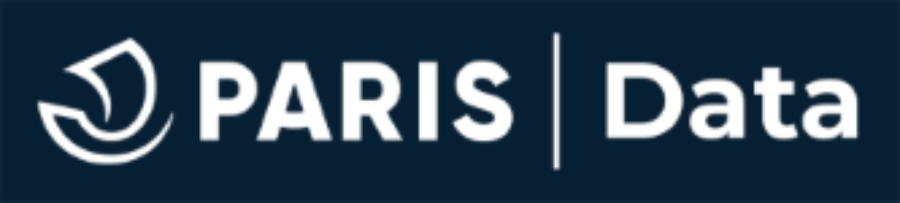
</div>
<br><br>

Dans ce challenge, nous allons réaliser une analyse exploratoire avec un jeu de données (source=<a href="https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets">opendata.paris.fr</a> ) portant sur les arbres de la ville de Paris.<br>
L'analyse exploratoire permettra par la suite de contribuer à une optimisation des tournées pour l'entretien des arbres de la ville.<br>
<br>
<br>
> "Eh oui, moins de tournées égale moins de trajets, et plus d’arbres entretenus".

<br>
<br>


# Présentation général du jeu de données

Dans cette section nous allons importez puis etudiez le contenue du fichier plat.<br>
<br>
Cette partie nous servira a mieux comprendre la structure du fichier et les données de celui-ci.<br>
Grâce à cette analyse rapide, nous pourons faire une analyse plus approfondie de sont contenue en mettons en relation certaine données.

## Importation du fichier

On commence par récupèrer le fichier plat et on le stock dans une dataframe.

In [2]:
import pandas as pd 
import numpy as np

# importation du fichier plat vers un dataframe
data = pd.read_csv("./data/p2-arbres-fr.csv",encoding="utf-8",sep=";")
print("Dimensionnalité du DataFrame: ", data.shape)
# visualtion du dataframe (5 premières lignes)
data.head()


Dimensionnalité du DataFrame:  (200137, 18)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


On remarque que le fichier contient un total de **200137 lignes et 18 colonnes**.


## Analyse Contenu du fichier

Nous allons maintenant regardez le contenu du fichier dans ça globalité afin de mieux le comprendre (type de données, et compréhension général).

In [3]:
# information sur les données
print("Info global de notre data frame :\n")
data.info()

Info global de notre data frame :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-n

Cette remontée d'information nous permet de connaître le type des colonnes, le nombre de valeurs non vide(*Non-Null*) et le nom des colonnes.<br>
On remarque que la colonnes **numero** semble être **vide**.
<br><br>
Avant tout petit rappel sur les types :
<ul>
    <li>int64 = Nombres entiers </li>
    <li>float64 = Nombre à virgule floattante</li>
    <li>bool = Valeur binaire (0/1 OU Vrais/Faux)</li>
    <li>object = Text ou autre valeur mixte (texte + numériques)</li>
</ul>
<br>
Grâce au nom des colonnes et aux informations receuillis on peut en déduire le role de chacun et leurs types : 

<ul>
    <li>id = <b>identification de la ligne (int)</b></li>
    <li>type_emplacement = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>domanialite = <b>type de domaine, lieux (object)</b></li>
    <li>arrondissement =<b> arrondissement de Paris (object)</b></li>
    <li>complement_addresse = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>lieu = <b>adresse exact (object)</b></li>
    <li>id_emplacement = <b>identification de l'emplacement (object)</b> </li>
    <li>libelle_francais = <b>nom français de l'arbre (object)</b></li>
    <li>genre = <b>genre de l'arbre (object)</b></li>
    <li>espece = <b>espèce de l'arbre (object)</b></li>
    <li>variete = <b style="color: red">a définir</b><b> (object)</b></li>
    <li>circonference_cm = <b>circonférence de l'arbre (en cm) (int)</b></li>
    <li>hauteur_m = <b>hauteur de l'arbre (en m) (int)</b></li>
    <li>stade_developpement = <b style="color: red">à définir</b><b> (object)</b></li>
    <li>remarquable = <b style="color: red">à définir</b><b> (float)</b></li>
    <li>geo_point_2d_a = <b>géolocation latitude (float)</b></li>
    <li>geo_point_2d_b = <b>géolocation longitude (float)</b></li>
</ul>

On peut vérifier les informations directement sur le site opendata.paris (lien dans la présentation).<br>
On va tout de même pour l'exercice et pour mieux comprendre analyser les valeurs encore à définir.

## Analyse des données uniques

Nous avons identifiez la plupart des données, on vas faire un focus sur les valeurs qu'il nous reste à définir. pour sa on regarde les valeurs que prennent chaques données.<br>
On commence par identifier les colonnes qu'on ne comprend pas encore avant d'analyser les autres données.

In [4]:
# on cherche toutes les valeurs uniques pour savoir si cette colonnes comprend une autre valeur que "Arbre"
data.type_emplacement.unique()

array(['Arbre'], dtype=object)

Pour le type d'emplacement **toute les valeurs sont équals à "Arbre"**.<br>Cette valeur indique certainement l'entité/objet présent (ici forcèment un arbre).

In [5]:
# On regarde les valeur que prend complement adresse
data[data.complement_addresse.notna()].complement_addresse.unique()

array(['c 12', '12-36', '12-35', ..., 'au n.14', 'F2bis', '40face'],
      dtype=object)

Pour complement_addresse on retrouve des complements d'adresses, qui peuvent correspondre à **des emplacements, des numéros d'adresse complémentaire ou des indications**.

In [6]:
# On regarde les valeur que prend la colonne "variete" (10 première valeur) pour comprendre la données
data.variete.unique()[:10]

array([nan, "Atropunicea'", "Euchlora'", "Schwedleri'", "Pissardii'",
       "Pallida'", 'n. sp.', "Chanticleer'", "Purpureum'", "Italica'"],
      dtype=object)

Pour variete on retrouve les différentes variétés d'arbre, on remarque également que l'**apostrophe** est ajouté **à la fin** de chaque nom de variétés. <br>
On peut également voir une valeur qui indique **"n. sp."**, on peut en déduire le terme **"non spécifié"**.

In [7]:
# On recommence avec stade_developpement comme pour variete
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

Pour stade_developpemnet on retrouve 4 valeurs, **A, J, JA et M**.<br>
En regardant sur le site opendata.paris on comprend que :
<ul>
    <li>J  = Jeune (arbre)</li>
    <li>JA = Jeune (arbre) Adulte</li>
    <li>A  = Adulte</li>
    <li>M  = Mature</li>
</ul>

In [8]:
# on recherche les valeurs unique de la colonne remarquable
data.remarquable.unique()

array([ 0., nan,  1.])

Pour remarquable, on voir 2 valeurs possibles qui sont 0 ou 1 en float. On peut donc considérer que c'est une valeur **boolean**.<br>
Désigne donc les arbres avec des spécificités particulières.

In [9]:
# toujours pareil mais avec domanialite
data.domanialite.unique()

array(['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC',
       'PERIPHERIQUE', 'DASES', nan], dtype=object)

On peut voir pour les domanialites que la syntaxe change entre **capitalize** et **uppper_case**

### Compréhension des données :
Pour résumer : 
<ul>
    <li>id = <b>identification de la ligne (int)</b></li>
    <li>type_emplacement = <b>désigne l'entité ici "Arbre"</b><b> (object)</b></li>
    <li>domanialite = <b>type de domaine, lieux</b><b> (object)</b></li>
    <li>arrondissement =<b>arrondissement de Paris</b><b> (object)</b></li>
    <li>complement_addresse = <b>complément d'adresse</b><b> (object)</b></li>
    <li>lieu = <b>adresse exact</b><b> (object)</b></li>
    <li>id_emplacement = <b>identification de l'emplacement</b><b> (object)</b> </li>
    <li>libelle_francais = <b>nom français de l'arbre</b><b> (object)</b></li>
    <li>genre = <b>genre de l'arbre</b><b> (object)</b></li>
    <li>espece = <b>espèce de l'arbre</b><b> (object)</b></li>
    <li>variete = <b>variété de l'arbre</b><b> (object)</b></li>
    <li>circonference_cm = <b>circonférence de l'arbre (en cm)(int)</b></li>
    <li>hauteur_m = <b>hauteur de l'arbre (en m) (int)</b></li>
    <li>stade_developpement = <b>maturité de l'arbre</b></li>
    <li>remarquable = <b>arbre remarquable (boolean)</b></li>
    <li>geo_point_2d_a = <b>géolocalisation latitude (float)</b></li>
    <li>geo_point_2d_b = <b>géolocalisation longitude (float)</b></li>
</ul>

Maintenant nous avons une meilleur compréhension et maitrisse des données.

In [10]:
# Toute les valeurs uniques
data_unique = pd.DataFrame(data.apply(lambda col : col.unique()),columns=["unique_value"])
# Le nombre de valeurs uniques
data_unique["unique_count"] = data.apply(lambda col : col.nunique())
# Le nombre de valeur non vide
data_unique["row_not_na"]=data.notna().astype(int).agg("sum")
# Le pourcentage de valeur unique
data_unique["unique_rate"]=((data_unique.unique_count / data_unique.row_not_na) * 100).round(4)

data_unique.sort_values(by='unique_rate',ascending=False)

,unique_value,unique_count,row_not_na,unique_rate
id,"[99874, 99875, 99876, 99877, 99878, 99879, 998...",200137,200137,100.0000
geo_point_2d_b,"[2.3209621099, 2.3210314229, 2.321060566, 2.32...",200114,200137,99.9885
geo_point_2d_a,"[48.8576199541, 48.8576560697, 48.8577050069, ...",200107,200137,99.9850
id_emplacement,"[19, 20, 21, 22, 000G0037, 000G0036, 000G0035,...",69040,200137,34.4964
complement_addresse,"[nan, c 12, 12-36, 12-35, face 64 Manin, 19-02...",3795,30902,12.2808
lieu,"[MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E, PA...",6921,200137,3.4581
variete,"[nan, Atropunicea', Euchlora', Schwedleri', Pi...",436,36777,1.1855
espece,"[hippocastanum, baccata, negundo, daniellii, x...",539,198385,0.2717
circonference_cm,"[20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...",531,200137,0.2653
libelle_francais,"[Marronnier, If, Erable, Arbre à miel, Platane...",192,198640,0.0967


### Analyse global des données unique


Ce tableau indique les valeur unique que prend chaque colonnes, ainsi que le nombre de valeur unique et le pourcentage sur le total de nombre de ligne non vide.<br>
La colonne **id** est **complète** et possèdent **que des valeurs uniques**. pour la **géoposition** on voir que **des valeurs sont doublés**. (sois même longitude ou même latitude)<br>
<br>
Nous avons déjà fait le détail de la plupart des valeur ci-dessus.<br>
On peut rappeler que la **domanialite** a des **syntaxes différentes**. on remarque également que l'**id d'emplacement** as des syntaxe différentes, <del>il peut surment être intéressant de transformer cette valeur en entier (**int**) pour une meilleur harmonisation/compréhension (**ex : 000G0037 = hexa(G) x 10000 + 37 = 470037**) cela</del> .

## Analyse des données manquantes

On vas maintenant passer à l'analyse des données manquantes, d'abord au global puis en détail.

In [11]:
# indication des valeurs manquantes
print("Pourcentage des valeurs manquante:")
(data.isna().mean() * 100).sort_values(ascending=True)

Pourcentage des valeurs manquante:


id                       0.000000
hauteur_m                0.000000
circonference_cm         0.000000
geo_point_2d_a           0.000000
id_emplacement           0.000000
lieu                     0.000000
geo_point_2d_b           0.000000
arrondissement           0.000000
type_emplacement         0.000000
domanialite              0.000500
genre                    0.007995
libelle_francais         0.747988
espece                   0.875400
remarquable             31.527404
stade_developpement     33.579498
variete                 81.624088
complement_addresse     84.559577
numero                 100.000000
dtype: float64

On peut voir ici que la colonne **numero** ne contient **aucune valeur**.<br>
Les colonnes complètes sont :
<ul>
    <li>id</li>
    <li>type_emplacement</li>
    <li>domanialite *(il manque une valeur)*</li>
    <li>arrondissement</li>
    <li>lieu</li>
    <li>id_emplacement</li>
    <li>circonference_cm</li>
    <li>hauteur_m</li>
    <li>geo_point_2d_a</li>
    <li>geo_point_2d_b</li>
</ul>

In [12]:
data[data.domanialite.isna()]

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
197239,2020911,Arbre,NaN,PARIS 20E ARRDT,NaN,NaN,JARDINS D IMMEUBLES PORTE DE VINCENNES NORD / ...,203006,Chimonanthe,Chimonanthus,praecox,NaN,35,4,JA,0.0,48.849547,2.41419


Etant la seul données vide pour cette colonnes, et toutes les autres données semblent pertinante, on peut penser que cette valeur vide est tout simplement un **oublie/erreur**.

In [13]:
columns_to_see = ["genre","domanialite","espece","variete","genre","espece","circonference_cm","hauteur_m","stade_developpement"]
# valeur des colonnes quand la colonne genre est vide.
data[data.genre.isna()][[col for col in columns_to_see]]

,genre,domanialite,espece,variete,genre,espece,circonference_cm,hauteur_m,stade_developpement
195404,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195409,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195410,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195475,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195476,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195487,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195496,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195497,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195499,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN
195502,NaN,Jardin,NaN,NaN,NaN,NaN,0,0,NaN


On voir qu'il y certainement une correlation quand la colonne **genre est vide** toutes les valeurs qui sont associés à une identification d'un arbre sont **NaN** ( **genre, espece, variete, espece, circonference_cm, hauteur_m et stade_developpement** ) et **domanialite** ça valeur prend **"Jardin"**.<br><br>
**On peut supposer que ce sont des arbres privées qui ne sont pas encore renseignés**.

>Attention cependant à ne pas faire la corrélation inverse, c'est à dire que si c'est un arbre privé ou que les donnée ne sont pas renseigner alors la colonne genre est forcement vide!

**Il est donc préférable de supprimer toutes ces lignes pour une future analyse.**

In [14]:
data[data.espece.isna()].head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
1725,101858,Arbre,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,D0030002,Pommier à fleurs,Malus,NaN,Aldenhamensis',40,4,NaN,NaN,48.880684,2.387536
2323,102582,Arbre,Jardin,PARIS 16E ARRDT,82 à 90,NaN,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,408032,Cornouiller,Cornus,NaN,Eddie's White Wonder',25,3,JA,0.0,48.872087,2.277040
2733,103215,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0167,Cerisier à fleurs,Prunus,NaN,Accolade',32,0,NaN,NaN,48.890072,2.316124
2742,103224,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000B0188,Cerisier à fleurs,Prunus,NaN,Accolade',60,0,NaN,NaN,48.890239,2.315838
3944,104827,Arbre,Jardin,PARIS 13E ARRDT,NaN,NaN,SQUARE RENE LE GALL,10255,Pommier à fleurs,Malus,NaN,Golden Hornet',40,4,NaN,NaN,48.832854,2.350704


Ici **aucune correlation** particulière pour la colonnes "espece" à vide.

 ## Analyse des doublons
 
 Dans cette partie nous allons analyser plus en détail chaque données pour identifier les doublons possible.

In [15]:
data_duplicate = pd.DataFrame(data.apply(lambda col : col.dropna().duplicated().agg("sum")),columns=["duplicate_value_count"])
# Le nombre de valeur non vide
data_duplicate["row_not_na"]=data.notna().astype(int).agg("sum")

data_duplicate["duplicate_rate"]=((data_duplicate.duplicate_value_count / data_duplicate.row_not_na) * 100).round(3)

data_duplicate["values_uniques"]=data.apply(lambda col : col.unique())

data_duplicate["unique_count"] = data.apply(lambda col : col.nunique())

data_duplicate.sort_values(by=["duplicate_rate",],ascending=False)

,duplicate_value_count,row_not_na,duplicate_rate,values_uniques,unique_count
type_emplacement,200136,200137,100.000,[Arbre],1
remarquable,137037,137039,99.999,"[0.0, nan, 1.0]",2
stade_developpement,132928,132932,99.997,"[nan, A, J, M, JA]",4
domanialite,200127,200136,99.996,"[Jardin, Alignement, DJS, DFPE, CIMETIERE, DAS...",9
arrondissement,200112,200137,99.988,"[PARIS 7E ARRDT, PARIS 17E ARRDT, PARIS 16E AR...",25
hauteur_m,199994,200137,99.929,"[5, 8, 10, 0, 17, 14, 3, 6, 4, 11, 7, 15, 9, 1...",143
genre,199946,200121,99.913,"[Aesculus, Taxus, Acer, Tetradium, Platanus, S...",175
libelle_francais,198448,198640,99.903,"[Marronnier, If, Erable, Arbre à miel, Platane...",192
circonference_cm,199606,200137,99.735,"[20, 65, 90, 60, 38, 37, 260, 145, 135, 15, 30...",531
espece,197846,198385,99.728,"[hippocastanum, baccata, negundo, daniellii, x...",539


Ce tableau nous donne un première aperçu des valeurs dupliquées dans ce jeu de données.<br>
On peut s'interresser au valeur ayant peut de duplication comme la **géolocalisation** identique qui n'est pas possible, 
on peut ensuite voir si l'**id_emplacement** a des valeurs ressemblantes et identique (format de texte) pour des eventuelle **doublons sur des syntaxes différentes**.

Pour les doublons de la géolocalisation, on vas vérifier des géolocalisation précise identique, car il est possible d'avoir la même latitude mais pas la même longitude et donc un emplacement différent.<br>
Pour ça, on vas donc rechercher les **emplacements identiques en latitude et longitude**.

In [16]:
# duplicated geo _a ET _b
same_geo = data[data.duplicated(['geo_point_2d_a','geo_point_2d_b'],keep=False)]
# list colonnes à voir
columns_to_see = ["domanialite","id_emplacement","lieu","genre","variete","libelle_francais","geo_point_2d_a","geo_point_2d_b","stade_developpement"]
# reindexation pour une meilleur visibilité.
index = [i for i in range(1,len(same_geo)+1)]
same_geo.index=index
# affichage
same_geo.sort_values(by=["geo_point_2d_a","id"])[[col for col in columns_to_see]]

,domanialite,id_emplacement,lieu,genre,variete,libelle_francais,geo_point_2d_a,geo_point_2d_b,stade_developpement
9,Alignement,402029,ROUTE DAUPHINE,Tilia,NaN,Tilleul,48.829912,2.439665,NaN
10,Alignement,402030,ROUTE DAUPHINE,Tilia,NaN,Tilleul,48.829912,2.439665,NaN
16,Jardin,190042,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Populus,NaN,Peuplier,48.836416,2.446277,NaN
17,Jardin,190042,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Populus,Italica',Peuplier,48.836416,2.446277,A
13,Jardin,210034,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Fagus,Rotundifolia',Hêtre,48.836862,2.446518,JA
20,Jardin,210035,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Malus,NaN,Pommier à fleurs,48.836862,2.446518,NaN
1,Jardin,5,JARDIN PARTAGE BEL-AIR,Ailanthus,NaN,Ailante,48.838318,2.406610,NaN
2,Jardin,6,JARDIN PARTAGE BEL-AIR,Ailanthus,NaN,Ailante,48.838318,2.406610,NaN
15,Jardin,20069,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Cedrus,NaN,Cèdre,48.838539,2.439350,A
22,Jardin,20129,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,Cedrus,NaN,Cèdre,48.838539,2.439350,NaN


Ce tableau nous donne plusieurs indications sur la duplication des géolocalisations, on remarque 4 symptomes :<br><br>

- Ligne 9 et 10 (index) par exemple, on remarque des **arbre simillaire** (libell, genre, variete) sur les **même géoposition mais a des id_emplacement qui se différencie souvent de 1**.<br><div style="color: #FB6F49;">On peut penser que ce sont des arbres identiques et très proche.</div>
<br><br>
- Ligne 16 et 17 (index) par exemple, on remarque **2 saisie identique avec juste une valeur qui diffère** (ici variete).<br><div style="color: #FB6F49;">On peut penser que c'est un oublie ou une mise à jours.</div>
<br><br>
- Ligne 12 et 19 (index) par exemple, on remarque **2 arbre différent à la même géolocalisation et le même id_emplacement**.<br><div style="color: #FB6F49;">On peut penser que c'est un nouvelle arbre qui a était planté (on peut sois prendre en compte le plus haut ID sois le stade developpement pour connaitre est le nouvelle arbre).</div>
<br><br>
- Ligne 5 et 8 (index) par exemple, on remarque **2 arbre identique** sur le type et la géolocalisation **mais a des id_emplacement et domanialite différent**.<br><div  style="color: #FB6F49;">On peut penser que c'est un changement de domanialite, on remarque une certaine corrélation entre la domanialite et le lieux (VOIE DF19 = VOIE DF/19) et en ne prennant que les derniers digit on remarque qu'il y a une corrélation : ...003 = 3, ..002 = 2.</div>

In [17]:
columns_to_see = ["domanialite","arrondissement","lieu","id_emplacement","libelle_francais","geo_point_2d_a","geo_point_2d_b"]
data[data.id_emplacement.duplicated(keep=False)].sort_values(by="id_emplacement")[[col for col in columns_to_see]].head(10)

,domanialite,arrondissement,lieu,id_emplacement,libelle_francais,geo_point_2d_a,geo_point_2d_b
2268,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0001,Pin,48.833118,2.299095
8946,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0001,Fevier,48.889081,2.315414
9688,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000A0001,Hêtre,48.824114,2.338959
8947,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0002,Fevier,48.889140,2.315472
2269,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0002,Pin,48.833096,2.299237
2270,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0003,Charme-Houblon,48.833044,2.299204
8413,Jardin,PARIS 14E ARRDT,PARC MONTSOURIS,000A0003,Hêtre,48.823903,2.339368
8948,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0003,Fevier,48.889201,2.315531
8949,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000A0004,Fevier,48.889261,2.315585
2271,Jardin,PARIS 15E ARRDT,PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE,000A0004,Pin,48.833083,2.299095


On peut voir ici que l'id_emplacement n'est pas un id unique à chaque emplacement ou arbre. On retrouve le même id_emplacement dans différent arrondissement/lieux.<br><br>
La question qui peut maintenant se poser est comment les donner sont générés ?

Nous pouvons analyser la répartition des doublons, puis voir si il est judicieux et facile de convertir toutes les valeurs au format numériques.

In [44]:
count = data.id_emplacement.value_counts()
modalite = count.index
test = pd.DataFrame(modalite,columns=["id_emplacement"])
test["count"] = count.values
test["frequency"]=(test["count"] / len(data.id_emplacement.notna()))*100
test = test.sort_values(by="frequency",ascending=False)
print("Le nombre de categories est de {} valeurs pour un total de {} valeurs.".
      format(len(test),test["count"].sum()))
test.head(10)

Le nombre de categories est de 69040 valeurs pour un total de 200137 valeurs.


,id_emplacement,count,frequency
0,101001,1324,0.661547
1,101002,1241,0.620075
2,101003,1128,0.563614
3,202001,1032,0.515647
4,101004,1020,0.509651
5,202002,964,0.481670
6,101005,906,0.452690
7,202003,879,0.439199
8,101006,829,0.414216
9,202004,802,0.400726


On peut voir qu'il y a un **grand nombres de categories d'id_emplacement**, et les 10 valeurs les plus reccurentes sont des valeurs numériques.

In [42]:
count = data[data.id_emplacement.apply(lambda x : x.isdigit())==False].id_emplacement.value_counts()
modalite = count.index
notdigit = pd.DataFrame(modalite,columns=["id_emplacement"])
notdigit["count"] = count.values
notdigit["frequency"]=(notdigit["count"] / len(data.id_emplacement.notna()))*100
notdigit = notdigit.sort_values(by="frequency",ascending=False)
print("Le nombre de categories ne pouvant être transformée en valeur numérique est de {} valeurs pour un total de {} valeurs.".
      format(len(notdigit),notdigit["count"].sum()))
print("Le pourcentage de valeur non numérique est de {}% .".
      format( (( notdigit["count"].sum() / len(data.id_emplacement.notna()) )*100).round(3) ))
notdigit.head(10)

Le nombre de categories ne pouvant être transformée en valeur numérique est de 35441 valeurs pour un total de 40216 valeurs.
Le pourcentage de valeur non numérique est de 20.094% .


,id_emplacement,count,frequency
0,D00000013001,12,0.005996
2,D00000010001,12,0.005996
3,D00000005001,12,0.005996
1,D00000007001,12,0.005996
4,D00000002001,11,0.005496
5,D00000003001,11,0.005496
6,D00000004001,11,0.005496
7,D00000012001,10,0.004997
8,D00000001002,10,0.004997
9,A14000003001,10,0.004997


On voir ici que la moitier des categorie de valeur sont en partie non numérique mais que cela ne représente que 20% du total des valeurs.<br><br>
Il peut être interresant de se renseigner des indications des saisies d'id_emplacement pour comprendre le role des valeurs non numérique dans cette colonnes.<br>
A première vue cette colonne ne semble pas bloquante et peut être classifier comme **valeur qualitative nominal** pour identifier un arbre grâce à plusieurs autres facteurs (domanialite, lieu, arrondissement, géolocalisation).

 # Analyse des données (statistique univariée)
 
 ## Démarche méthodologique d'analyse de données

<ul>
    <li>Analyse quantitative</li>
    <li>Analyse qualitative</li>
    <li>Analyse des abération (outliers)</li>
</ul>


In [29]:
# Description des données de circonférence hauteur et géolocalisation
def highlight_cell(val):
    color = 'red' if (val < 673 + 1 and val > 673 - 1) or (val < 1971 + 1 and val > 1971 -1) else 'black'
    return 'color: %s' % color

descr = data[["circonference_cm","hauteur_m","geo_point_2d_a","geo_point_2d_b"]].describe()
descr = descr.style.applymap(highlight_cell)
descr

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,48.854491,2.348208
std,673.190213,1971.217387,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307530
50%,70.000000,8.000000,48.854162,2.351095
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


On remarque que **l'écart-type** de la **ciconference_cm et de la hauteur_m** est **très elevé** par rapport au valeurs moyennes et la moyenne des valeur des première 75%. <br>
On peut supposer qu'il y a des valeurs abérrantes pour ces 2 colonnes.<br>
Pour ce qui est de la géolocalisation des arbres les valeurs sembles cohérentes à première vue.

 # Analyse des données (statistique bivariée) ?


# Nettoyage du jeu de données

# Synthèse analyse de données